# Prıprava dat
## Zadanie: 
Načtěte dataset a ujistěte se, že rozumíte hodnotám ve sloupcích. Můžete změnit názvy sloupců a odstranit z nich mezery, což se vám může později hodit.

## My solution
1. using pandas function read_csv to load data
2. preparing dataset by removing spaces in column names, renaming colums to use the same convention
    -  calling attribute of the DataFrame *.columns*, that holds the column names
    -  using StringMethods *str* that allows me applying string operations on the  array of column names
        - using method *.rename()* to change column names  to new column_mapping (dictionary)
        - using method *.strip()* to remove any spaces from each column name
        - using method *.replace(' ', '_')* to replace each space with an underscore 
3. checking dataset 
    - calling method .head() to display the first 5 rows
    - calling attribute .columns to display its column names


In [58]:
import pandas as pd # type: ignore

data = pd.read_csv("data/adm_data.csv")

# Remove spaces from column names
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Rename columns (same convention)
column_mapping = {
    'Serial_No.': 'Serial_Number',
    'GRE_Score': 'GRE_Score',
    'TOEFL_Score': 'TOEFL_Score',
    'University_Rating': 'University_Rating',
    'SOP': 'SOP',
    'LOR_': 'LOR',
    'CGPA': 'CGPA',
    'Research': 'Research',
    'Chance_of_Admit_': 'Chance_of_Admit'
}
data.rename(columns=column_mapping, inplace=True)

# Check the new column names and first few rows of data
data.head(), data.columns



(   Serial_Number  GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  \
 0              1        337          118                  4  4.5  4.5  9.65   
 1              2        324          107                  4  4.0  4.5  8.87   
 2              3        316          104                  3  3.0  3.5  8.00   
 3              4        322          110                  3  3.5  2.5  8.67   
 4              5        314          103                  2  2.0  3.0  8.21   
 
    Research  Chance_of_Admit  
 0         1             0.92  
 1         1             0.76  
 2         1             0.72  
 3         1             0.80  
 4         0             0.65  ,
 Index(['Serial_Number', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
        'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
       dtype='object'))

# Normalita dat pro TOEFL skóre
## Zadanie: 

1. Vypočítejte průměr a medián pro TOEFL skóre.
2. Vypočítejte směrodatnou odchylku.
3. Vytvořte histogram pro TOEFL skóre a nezapomeňte zobrazit odhadovanou křivku pravděpodobnostního rozdělení.
4. Otestujte, zda je TOEFL skóre vybráno z normálního rozdělení pomocí statistického testu. Uvažujte hladinu.

## My solution
1. using methods .mean() and .median() over the column TOEFL_Score
2. using method .std() over the TOEFL_Score column to calculate standard deviation and round it to 2 decimals
3. importing the libs seaborn and matplotlib, using 
    - plt.title, plt.xlabel and plt.ylabel to setting up the description of histogram
    - sns.histplot to create histogram over the column TOEFL_score
    - using parameter kde=True to display KDE curve to the histogram
    - setting number of gistogram bins by parameter bins and setting color of bins
    - using method *plt.axvline()* for adding lines for median and mean values displayed in histogram, and attributes
        -  *color* for setting lines colors,
        - *linestyle* for setting the lines styiling
        - *label* for setting info for legend()
4. defining hyphotesis and test the normality
    - Import the *normaltest* function with alias 'nt'
    - setting up the H0 and H1 hyphotesis
    - using alpha value 5% to count stat and p-value
    - compair alpha value and counted p-value and reject or actept hypothesis

In [59]:
# Calculate Mean, Median
mean_toefl = data['TOEFL_Score'].mean()
median_toefl = data['TOEFL_Score'].median()

mean_toefl, median_toefl

(107.41, 107.0)

In [60]:
# Calculate standard deviation for TOEFL Score
toefl_std = data['TOEFL_Score'].std()

# Round the standard deviation to 2 decimal places
toefl_std_rounded = round(toefl_std, 2)
toefl_std_rounded

6.07

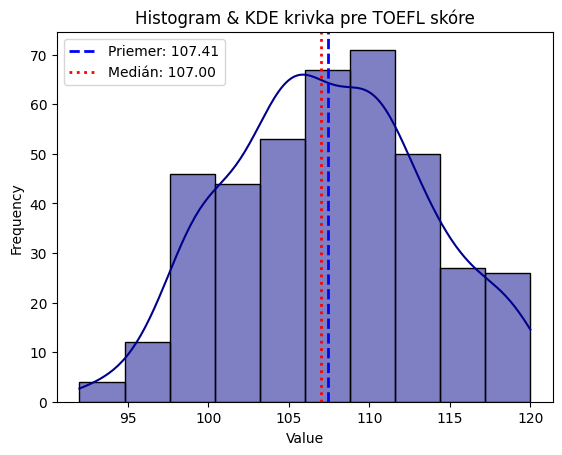

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an example plot
sns.histplot( data['TOEFL_Score'], kde=True, bins=10, color="darkblue")

plt.title("Histogram & KDE krivka pre TOEFL skóre")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Adding mean and median to the plot
plt.axvline(mean_toefl, color='blue', linestyle='dashed', linewidth=2, label=f"Priemer: {mean_toefl:.2f}")
plt.axvline(median_toefl, color='red', linestyle='dotted', linewidth=2, label=f"Medián: {median_toefl:.2f}")

plt.legend()
plt.show()

In [68]:
from scipy.stats import normaltest as nt  

# Formulation of hypotheses:
# H0: Data follow a normal distribution
# H1: Data do not follow a normal distribution

alpha = 0.05

# Testing for normality using the DAgostino-Pearson test
stat, p_value = nt(data['TOEFL_Score'])

if p_value > alpha:
   print("TOEFL Score follows a normal distribution (failed to reject H0)")
else:
   print("TOEFL Score does not follow a normal distribution (reject H0)")

print("D'Agostino-Pearson Test:")
print(f"  stat = {stat:.3f}")
print(f"  p-value = {p_value:.3f}")



TOEFL Score does not follow a normal distribution (reject H0)
D'Agostino-Pearson Test:
  stat = 11.070
  p-value = 0.004


# Result task 1:
The p-value is lower than 0.05 (alpha = 0.05), indicating that we have sufficient evidence to reject the null hypothesis (H0).
This result suggests that the TOEFL Score data do not follow a normal distribution.

# Testování hypotéz
## Zadanie
1. Rozdělte data na studenty, kteří mají a nemají zkušenost s výzkumem.
2. Pro obě skupiny spočítejte průměrné GRE skóre.
3. Statisticky otestujte, zda existuje statisticky významný rozdíl v GRE skóre mezi těmito dvěma skupinami studentů. Vyberte správný test a nezapomeňte krátce okomentovat vyhodnocení testu.

## My solution
- importing method  *mannwhitneyutest* from scipy.stats and
1. dividing students based on research experience - 1 value in column 'Research' means they have experience, 0 they dont
2. calculating the average GRE score for both groups by using *mean()* method and rounding it to three decimal places.
3. the TOEFL scores do not follow a normal distribution, it raises a question about the distribution of the GRE scores as well. The t-test is sensitive to non-normal distributions, which can affect the accuracy  of its results, so I won't use it and will choose  Mann-Whitney test instead. 
    - using  *mannwhitneyutest* method for  Mann-Whitney U test to compare the GRE scores between the two groups. 
    - using parameter *alternative='two-sided'* to check for any difference in distributions, not just a one-sided difference
    - creating the visualization of results by using a boxplot to display the distribution of GRE scores across the two groups based on research experience

Average GRE score for students with research experience is: 322.854
Average GRE score for students without research experience is: 309.492

Statistical Testing of Difference in GRE Scores Between the Two Groups:
U-statistic: 33514.000
P-value: 0.000
There is a statistically significant difference in GRE scores between the two groups (reject H0).


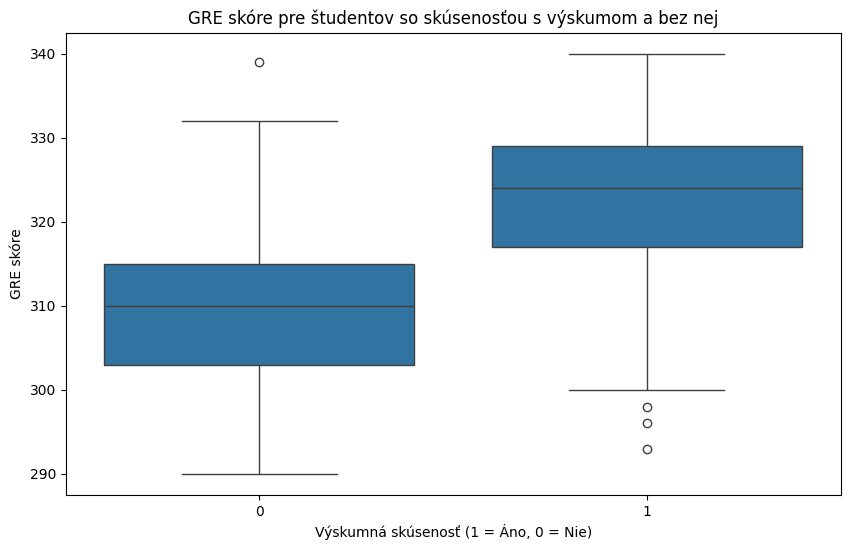

In [71]:
from scipy.stats import mannwhitneyu as mannwhitneyutest
data['Research'].head()

# Dividing students based on research experience 
students_with_research_experience = data[data['Research'] == 1]
students_without_research_experience = data[data['Research'] == 0]

# Calculating the average GRE score for both groups
mean_GRE_with_experience = students_with_research_experience['GRE_Score'].mean()
mean_GRE_without_experience = students_without_research_experience['GRE_Score'].mean()

print(f"Average GRE score for students with research experience is: {mean_GRE_with_experience:.3f}")
print(f"Average GRE score for students without research experience is: {mean_GRE_without_experience:.3f}")

# Statistical testing - Mann-Whitney U test for non-parametric independent samples
u_stat, p_value = mannwhitneyutest(students_with_research_experience['GRE_Score'], students_without_research_experience['GRE_Score'], alternative='two-sided')

alpha = 0.05


print("\nStatistical Testing of Difference in GRE Scores Between the Two Groups:")
print(f"U-statistic: {u_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("There is a statistically significant difference in GRE scores between the two groups (reject H0).")
else:
    print("There is no statistically significant difference in GRE scores between the two groups (fail to reject H0).")

# Vizualizácia rozdielov
plt.figure(figsize=(10, 6))
sns.boxplot(x='Research', y='GRE_Score', data=data)
plt.title("GRE skóre pre študentov so skúsenosťou s výskumom a bez nej")
plt.xlabel("Výskumná skúsenosť (1 = Áno, 0 = Nie)")
plt.ylabel("GRE skóre")
plt.show()

## Result Task 2:

The Mann-Whitney U test results, with a U-statistic of 33514.000 and a p-value of less than 0.001,  exceed the alpha threshold of 0.05. This indicates compelling evidence to reject the null hypothesis (H0). The findings clearly demonstrate that students with research experience have higher average GRE scores (322.854) compared to those without research experience (309.492). This statistically significant difference underscores the impact of research experience on enhancing GRE performance.